In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
#Displaying first few rows of the dataset
print(df.head())

#Checking for null values
print(df.isnull().sum())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course    

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [4]:
#Checking the summary statistics
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


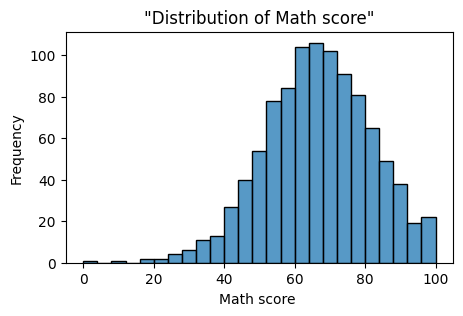

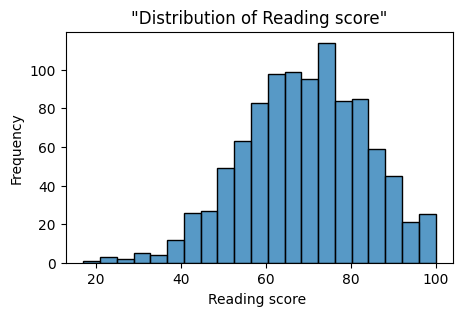

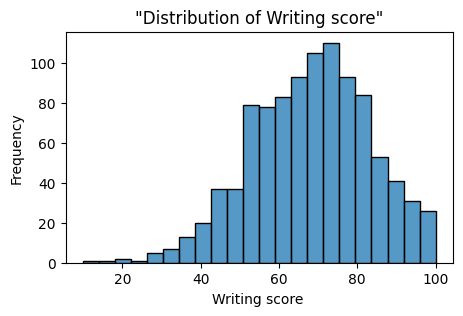

In [5]:
#histplot of subjects

import matplotlib.pyplot as plt
import seaborn as sns

subjects=["math score","reading score","writing score"]
for subject in subjects:
    plt.figure(figsize=(5,3))
    sns.histplot(df[subject])
    plt.title(f'"Distribution of {subject.capitalize()}"')
    plt.xlabel(f'{subject.capitalize()} ')
    plt.ylabel('Frequency')
    plt.show()    

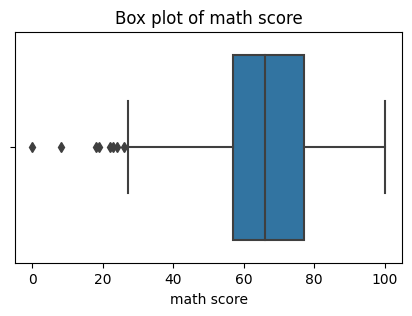

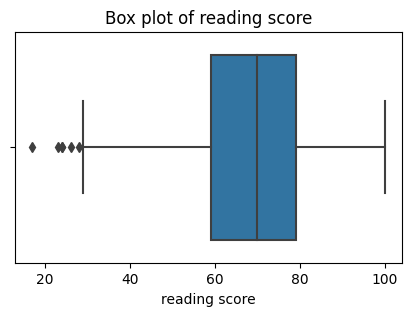

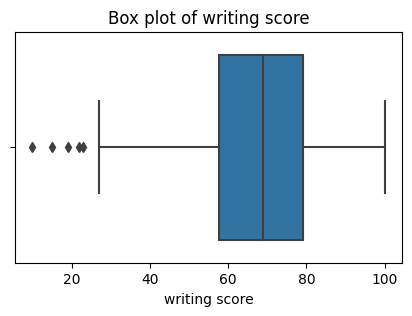

In [6]:
#sns boxplot for subjects

for subject in subjects:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[subject])
    plt.title(f'Box plot of {subject}')
    plt.xlabel(subject)
    plt.show()

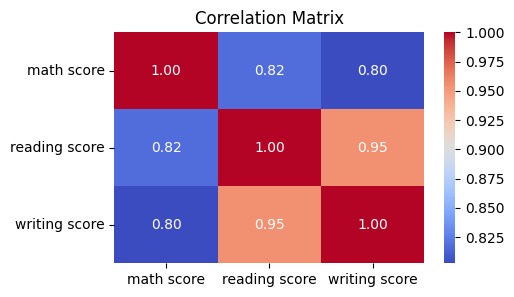

In [7]:
# Compute the correlation matrix

correlation_matrix=df[subjects].corr()

# Plot a heatmap of the correlation matrix

plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

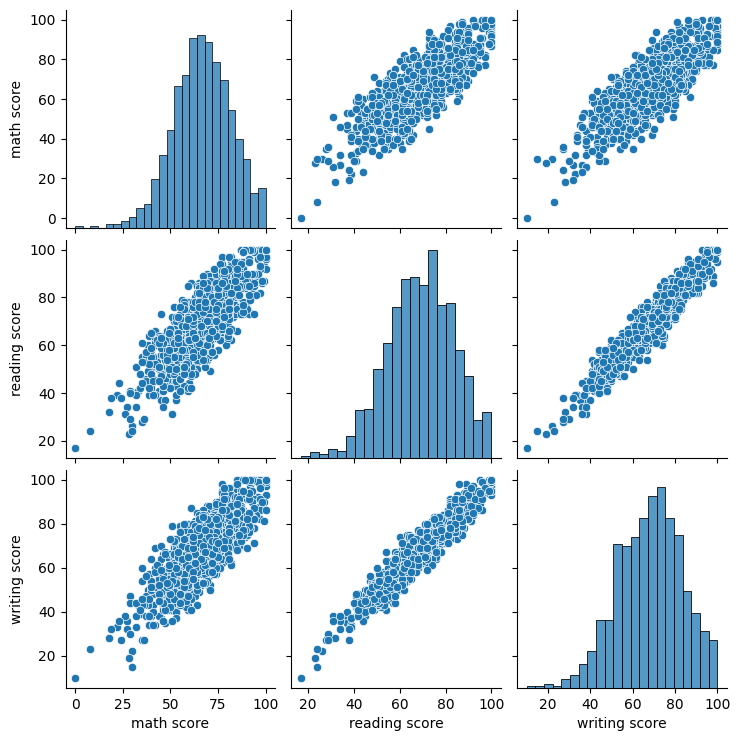

In [8]:
# Create pair plots for subjects
sns.pairplot(df[subjects])
plt.show()

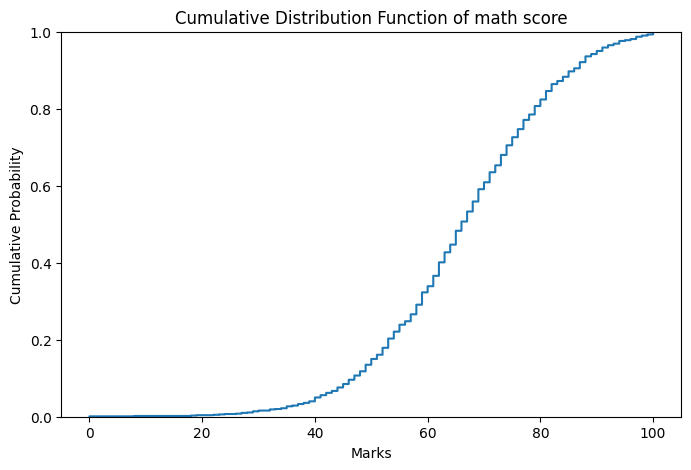

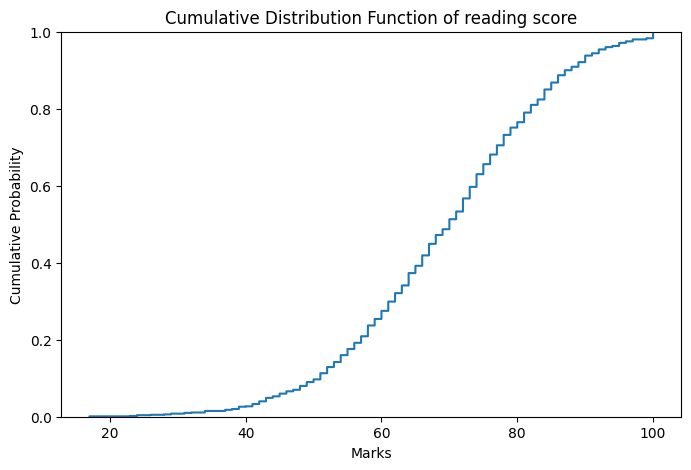

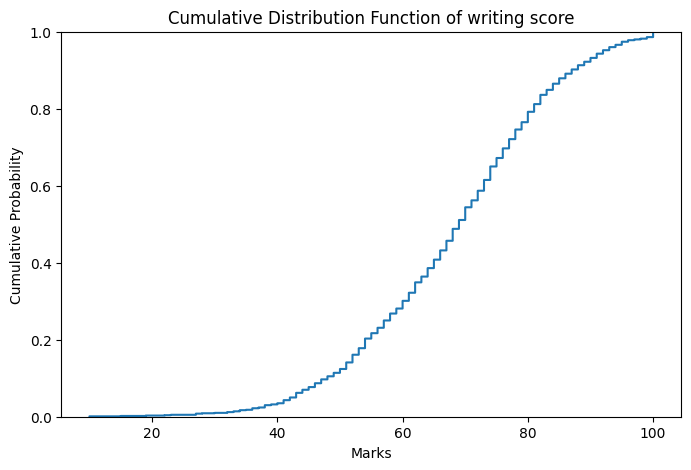

In [9]:
# Plot CDF for each subject

for subject in subjects:
    plt.figure(figsize=(8, 5))
    sns.ecdfplot(df[subject])
    plt.title(f'Cumulative Distribution Function of {subject}')
    plt.xlabel('Marks')
    plt.ylabel('Cumulative Probability')
    plt.show()

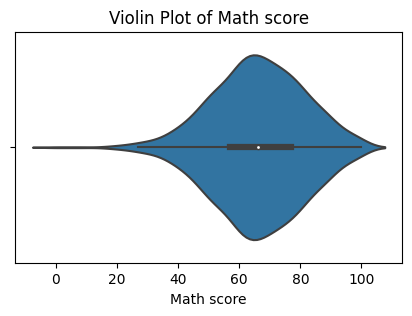

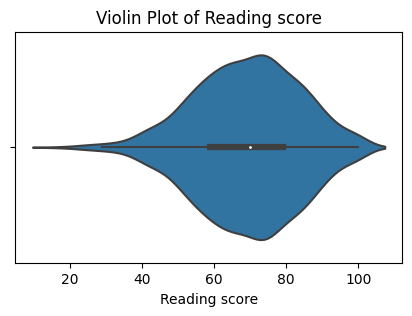

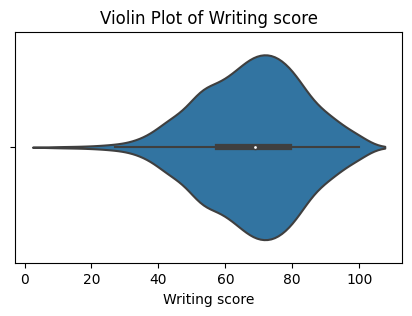

In [10]:
# Create violin plots for subjects
for subject in subjects:
    plt.figure(figsize=(5,3))
    sns.violinplot(x=df[subject])
    plt.title(f'Violin Plot of {subject.capitalize()}')
    plt.xlabel(subject.capitalize())
    plt.show()

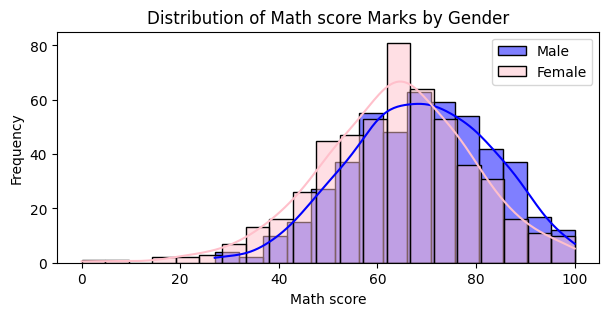

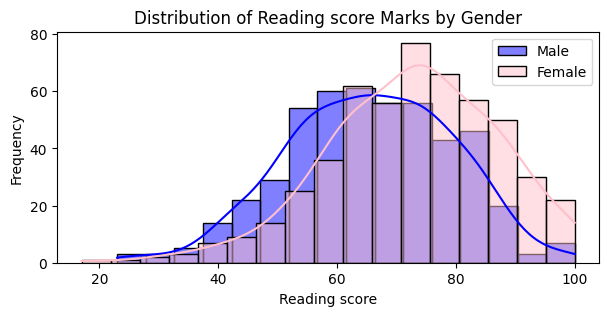

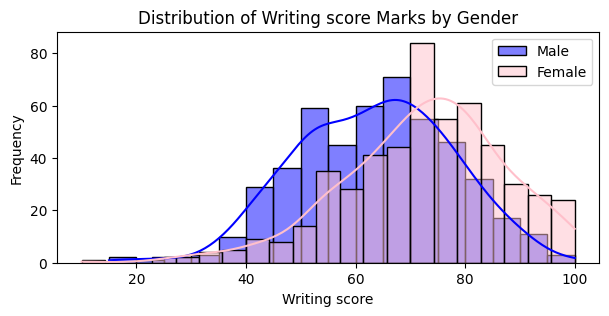

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each subject based on gender

for subject in subjects:
    plt.figure(figsize=(7,3))
    sns.histplot(df[df['gender'] == 'male'][subject], label='Male', kde=True, color='blue', alpha=0.5)
    sns.histplot(df[df['gender'] == 'female'][subject], label='Female', kde=True, color='pink', alpha=0.5)
    
    plt.title(f'Distribution of {subject.capitalize()} Marks by Gender')
    plt.xlabel(f'{subject.capitalize()}')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


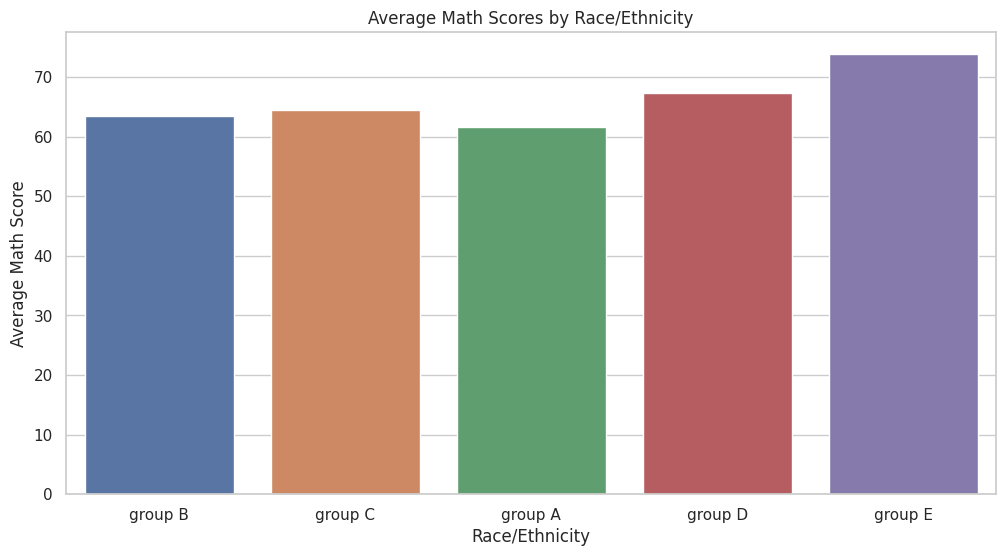

In [12]:
#Score Distributions by Race/Ethnicity

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Creating a bar plot for average scores by race/ethnicity
plt.figure(figsize=(12, 6))
sns.barplot(x="race/ethnicity", y="math score", data=df, errorbar=None)  
plt.title('Average Math Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Math Score')
plt.show()
